In [10]:
### Training a Linear Classifier

# Load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data with only two classes and two features
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier
svc = LinearSVC(C=1.0)
svc.fit(features, target)

array([-1.08988399])

In [11]:
### weight and biase

svc.coef_
svc.intercept_ 

array([-1.08988399])

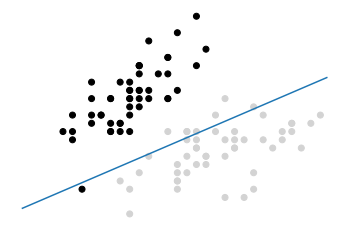

In [12]:
### plot

# Load library
from matplotlib import pyplot as plt
# Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In [13]:
# Create new observation
new_observation = [[ -2, 3]]

# Predict class of new observation
svc.predict(new_observation)

array([0])

In [14]:
###  Handling Linearly Inseparable Classes Using Kernels

# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Set randomization seed
np.random.seed(0)
# Generate two features
features = np.random.randn(200, 2)

In [15]:
# Use a XOR gate (you don't need to know what this is) to generate
# linearly inseparable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

In [16]:
# Train the classifier
model = svc.fit(features, target)

In [17]:
# Create support vector classifier with a linear kernel
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# Train model
svc_linear.fit(features, target)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
### Creating Predicted Probabilities

# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier object
svc = SVC(kernel="linear", probability=True, random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

# Create new observation
new_observation = [[.4, .4, .4, .4]]

# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00582525, 0.96725691, 0.02691783]])

In [19]:
####  Identifying Support Vectors

# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

#Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier object
svc = SVC(kernel="linear", random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

# View support vectors
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

In [20]:
model.support_

array([23, 41, 57, 98])

In [21]:
model.n_support_

array([2, 2])

In [22]:
### Handling Imbalanced Classes

# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

#Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# Make class highly imbalanced by removing first 40 observations
features = features[40:,:]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)